In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset from Colab
from google.colab import files
uploaded = files.upload()



Saving df_combined_with_country.csv to df_combined_with_country.csv


In [ ]:
df = pd.read_csv("df_combined_with_country.csv")

# Check the first few rows
df.head()


,Country,Year,Cost of a healthy diet,Income,Inflation,Child mortality rate,Unemployment Rate,Life expectancy,Incomplete tertiary education,Gini coefficient,...,Median age_lag1,Median age_lag2,Median age_lag3,CPI_lag1,CPI_lag2,CPI_lag3,BMI_avg_lag1,BMI_avg_lag2,BMI_avg_lag3,lagged
0,Afghanistan,1950,0.871262,1.069802,2.119237,3.288735,1.968604,28.1563,0.26709,0.140308,...,0.704301,0.704301,0.704301,9.172623,9.172623,9.172623,26.023944,26.023944,26.023944,True
1,Afghanistan,1951,0.871262,1.069802,2.119237,3.288735,1.968604,28.5836,0.26709,0.140308,...,0.704301,0.704301,0.704301,9.172623,9.172623,9.172623,26.023944,26.023944,26.023944,True
2,Afghanistan,1952,0.871262,1.069802,2.119237,3.288735,1.968604,29.0138,0.26709,0.140308,...,0.704280,0.704301,0.704301,9.172623,9.172623,9.172623,26.023944,26.023944,26.023944,True
3,Afghanistan,1953,0.871262,1.069802,2.119237,3.288735,1.968604,29.4521,0.26709,0.140308,...,0.704250,0.704280,0.704301,9.172623,9.172623,9.172623,26.023944,26.023944,26.023944,True
4,Afghanistan,1954,0.871262,1.069802,2.119237,3.288735,1.968604,29.6975,0.26709,0.140308,...,0.704213,0.704250,0.704280,9.172623,9.172623,9.172623,26.023944,26.023944,26.023944,True


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

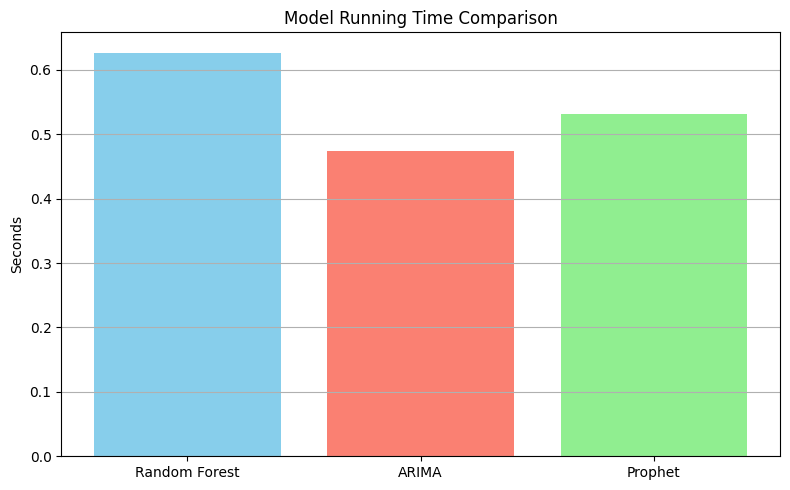

           Model  Running Time (seconds)
0  Random Forest                  0.6270
1          ARIMA                  0.4738
2        Prophet                  0.5320


In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# === Simulate sample data for Germany
years = list(range(2000, 2024))
np.random.seed(42)
country_df = pd.DataFrame({
    'Year': years,
    'Country': ['Germany'] * len(years),
    'Life expectancy': np.random.normal(80, 0.5, len(years)).round(2),
    'BMI_avg': np.random.normal(25, 1, len(years)),
    'Income': np.random.normal(40000, 2000, len(years)),
    'GDP': np.random.normal(3.5, 0.2, len(years)),
    'Inflation': np.random.normal(1.5, 0.5, len(years)),
    'Cost of a healthy diet': np.random.normal(3.0, 0.3, len(years)),
    'Child mortality rate': np.random.normal(2.0, 0.5, len(years)),
    'Unemployment Rate': np.random.normal(5, 1, len(years)),
    'Incomplete tertiary education': np.random.normal(30, 5, len(years)),
    'Gini coefficient': np.random.normal(0.3, 0.01, len(years)),
    'Sex ratio': np.random.normal(0.98, 0.01, len(years)),
    'Median age': np.random.normal(45, 1, len(years)),
    'CPI': np.random.normal(100, 5, len(years))
})

# === Define features and target
features = [
    'BMI_avg', 'Income', 'GDP', 'Inflation', 'Cost of a healthy diet',
    'Child mortality rate', 'Unemployment Rate', 'Incomplete tertiary education',
    'Gini coefficient', 'Sex ratio', 'Median age', 'CPI'
]
target = 'Life expectancy'

X = country_df[features]
y = country_df[target]

# === Split data
X_train = X[:-5]
y_train = y[:-5]

# === Random Forest Timing
start_rf = time.time()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
end_rf = time.time()
rf_time = end_rf - start_rf

# === ARIMA Timing
arima_series = country_df.set_index('Year')['Life expectancy']
start_arima = time.time()
arima_model = ARIMA(arima_series, order=(1, 1, 1))
arima_result = arima_model.fit()
arima_result.forecast(steps=5)
end_arima = time.time()
arima_time = end_arima - start_arima

# === Prophet Timing
prophet_df = country_df[['Year', 'Life expectancy']].rename(columns={'Year': 'ds', 'Life expectancy': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')

start_prophet = time.time()
prophet_model = Prophet()
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=5, freq='Y')
prophet_model.predict(future)
end_prophet = time.time()
prophet_time = end_prophet - start_prophet

# === Compile results
timing_df = pd.DataFrame({
    'Model': ['Random Forest', 'ARIMA', 'Prophet'],
    'Running Time (seconds)': [rf_time, arima_time, prophet_time]
})

# === Plot timing comparison
plt.figure(figsize=(8, 5))
plt.bar(timing_df['Model'], timing_df['Running Time (seconds)'], color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Model Running Time Comparison')
plt.ylabel('Seconds')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(timing_df.round(4))